In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20, 8

In [2]:
data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')

In [3]:
data.head()

,ID,Count
0,2011100100,135
1,2011100101,96
2,2011100102,111
3,2011100103,102
4,2011100104,54


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 2 columns):
ID       13152 non-null int64
Count    13152 non-null int64
dtypes: int64(2)
memory usage: 205.6 KB


In [5]:
data.isnull().values.any()

False

In [6]:
print data.shape
print data.dtypes

(13152, 2)
ID       int64
Count    int64
dtype: object


In [7]:
data['ID']=pd.to_datetime(data['ID'], format='%Y%m%d%H')

In [8]:
data.head()

,ID,Count
0,2011-10-01 00:00:00,135
1,2011-10-01 01:00:00,96
2,2011-10-01 02:00:00,111
3,2011-10-01 03:00:00,102
4,2011-10-01 04:00:00,54


In [9]:
data.dtypes

ID       datetime64[ns]
Count             int64
dtype: object

In [10]:
data.set_index('ID', inplace=True)
data.head()

,Count
ID,
2011-10-01 00:00:00,135
2011-10-01 01:00:00,96
2011-10-01 02:00:00,111
2011-10-01 03:00:00,102
2011-10-01 04:00:00,54


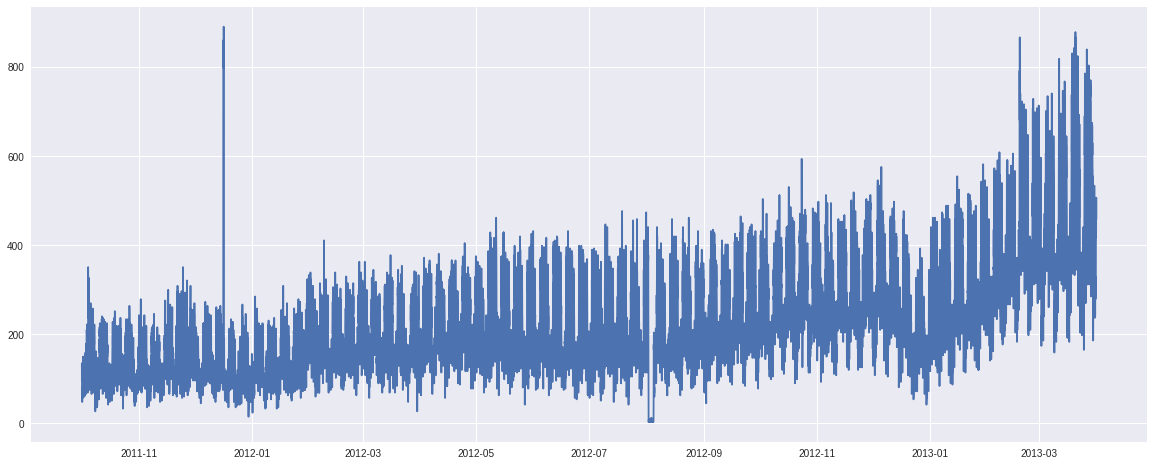

In [11]:
plt.plot(data)

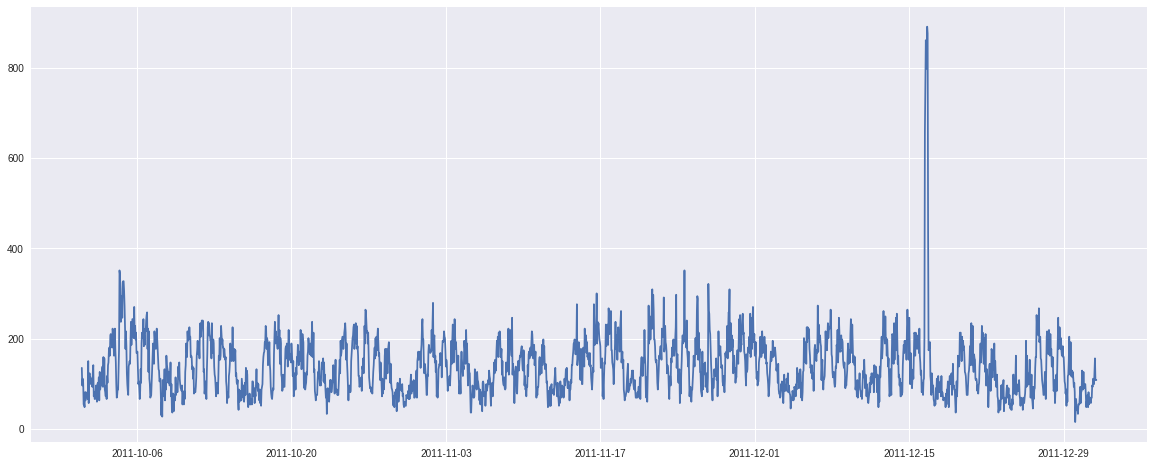

In [12]:
plt.plot(data['2011'])

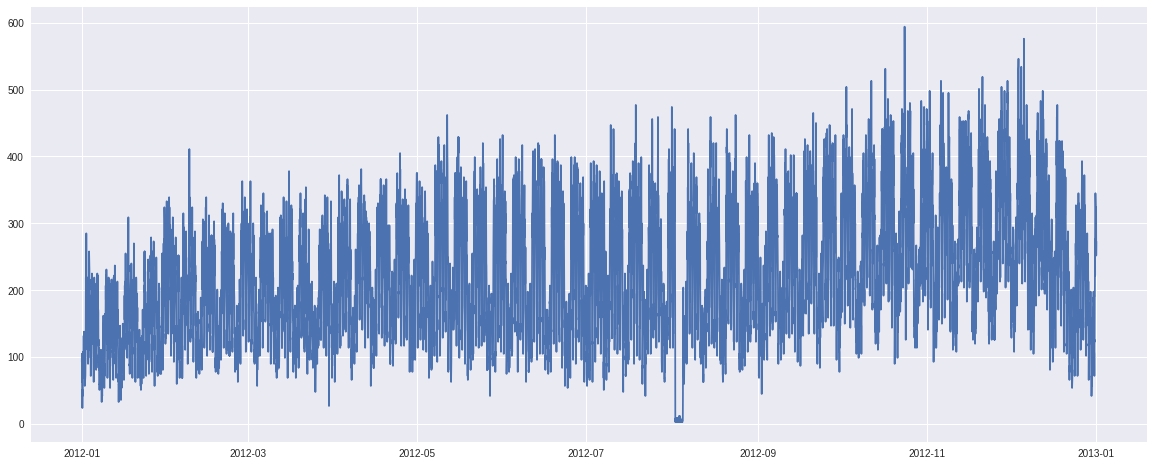

In [13]:
plt.plot(data['2012'])

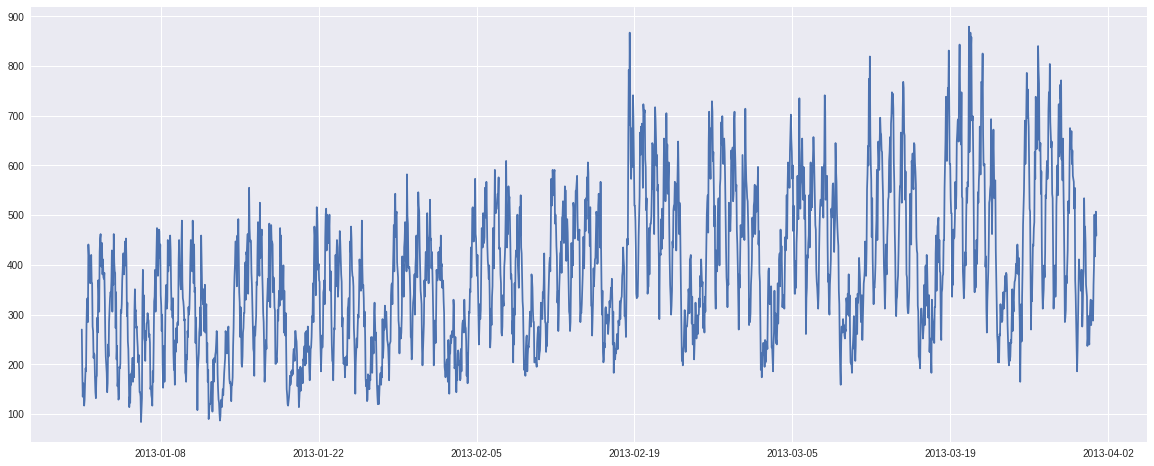

In [14]:
plt.plot(data['2013'])

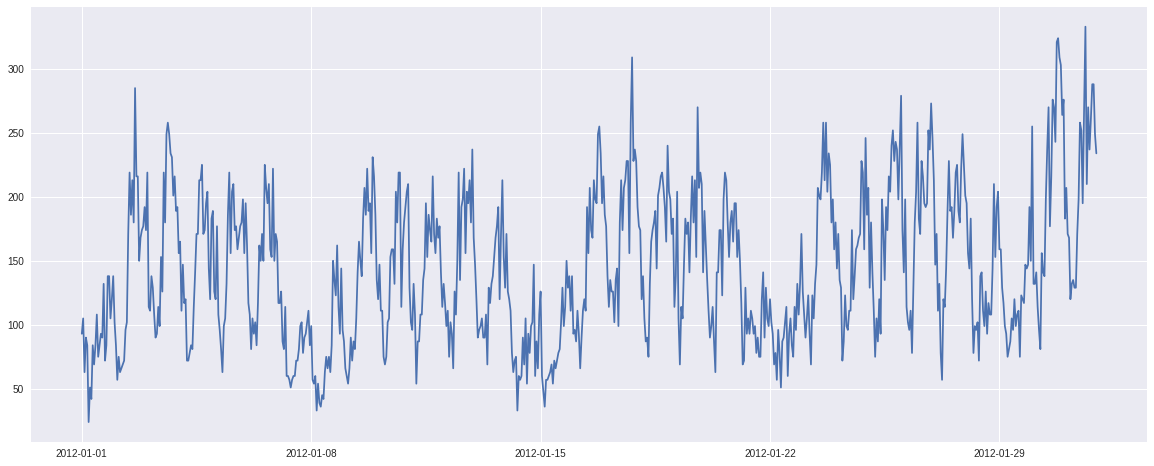

In [15]:
plt.plot(data['2012-01'])

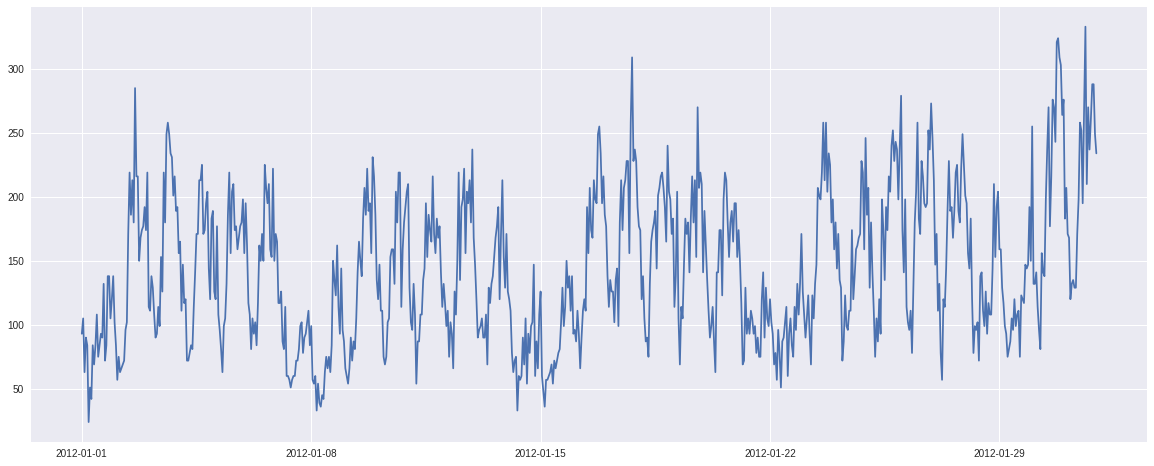

In [16]:
plt.plot(data['2012-1'])

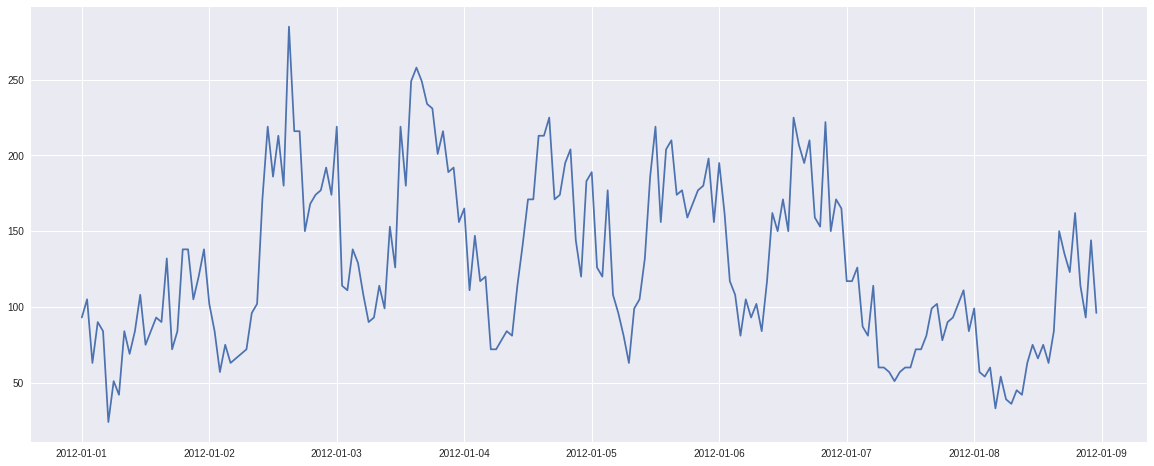

In [17]:
plt.plot(data['2012-01-01':'2012-01-08'])

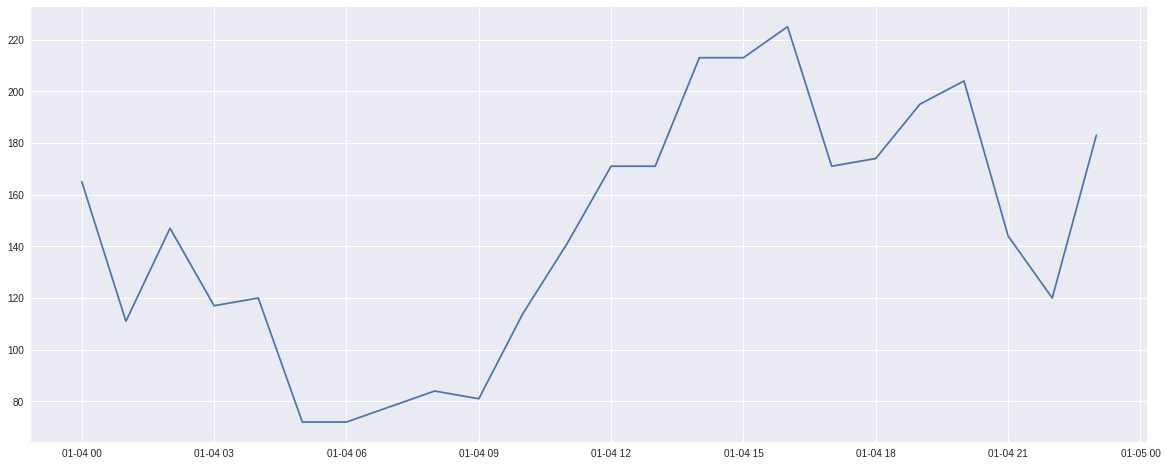

In [18]:
plt.plot(data['2012-01-04'])

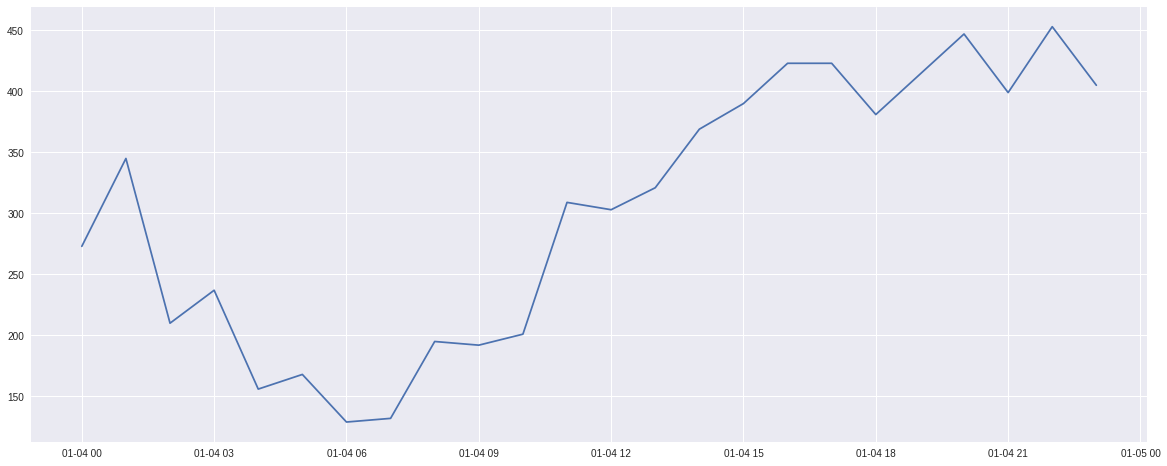

In [19]:
plt.plot(data['2013-01-04'])

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries.unstack(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/home/prabhat/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


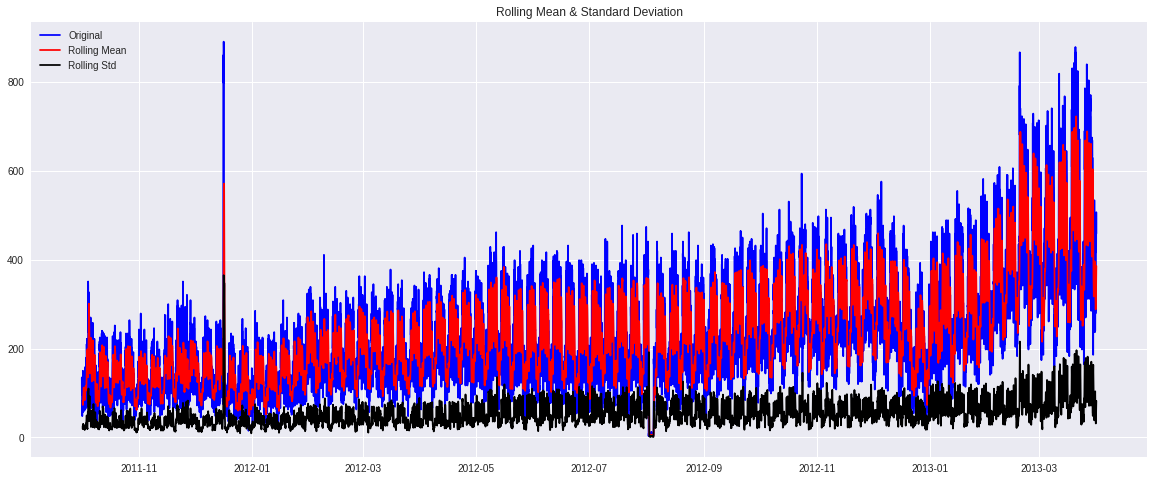

Results of Dickey-Fuller Test:
Test Statistic                -8.719046e+00
p-value                        3.425034e-14
#Lags Used                     4.100000e+01
Number of Observations Used    1.311000e+04
Critical Value (5%)           -2.861760e+00
Critical Value (1%)           -3.430849e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [21]:
test_stationarity(data)

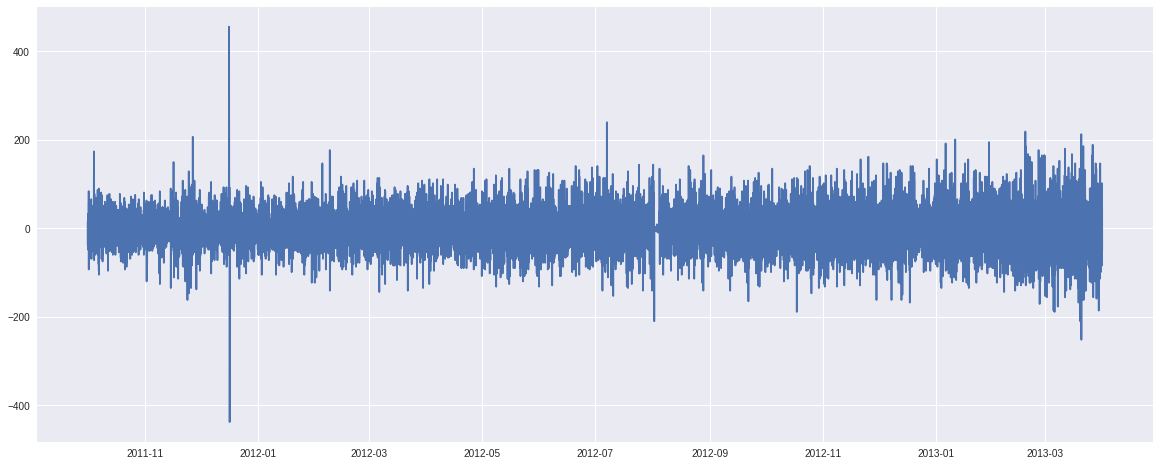

In [22]:
data_diff = data - data.shift()
plt.plot(data_diff)

/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


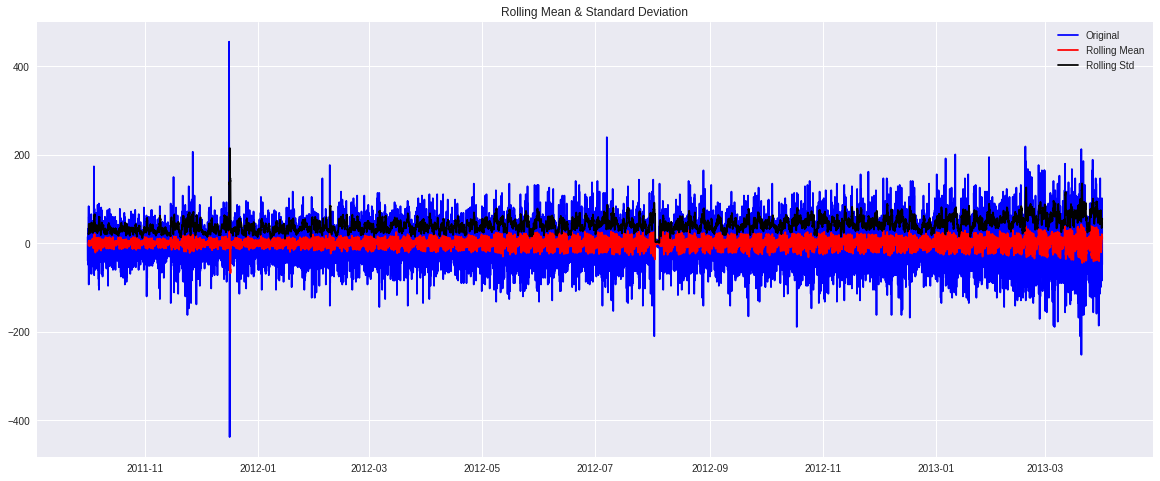

Results of Dickey-Fuller Test:
Test Statistic                   -19.528344
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    13109.000000
Critical Value (5%)               -2.861761
Critical Value (1%)               -3.430849
Critical Value (10%)              -2.566887
dtype: float64


In [23]:
data_diff.dropna(inplace=True)
test_stationarity(data_diff)

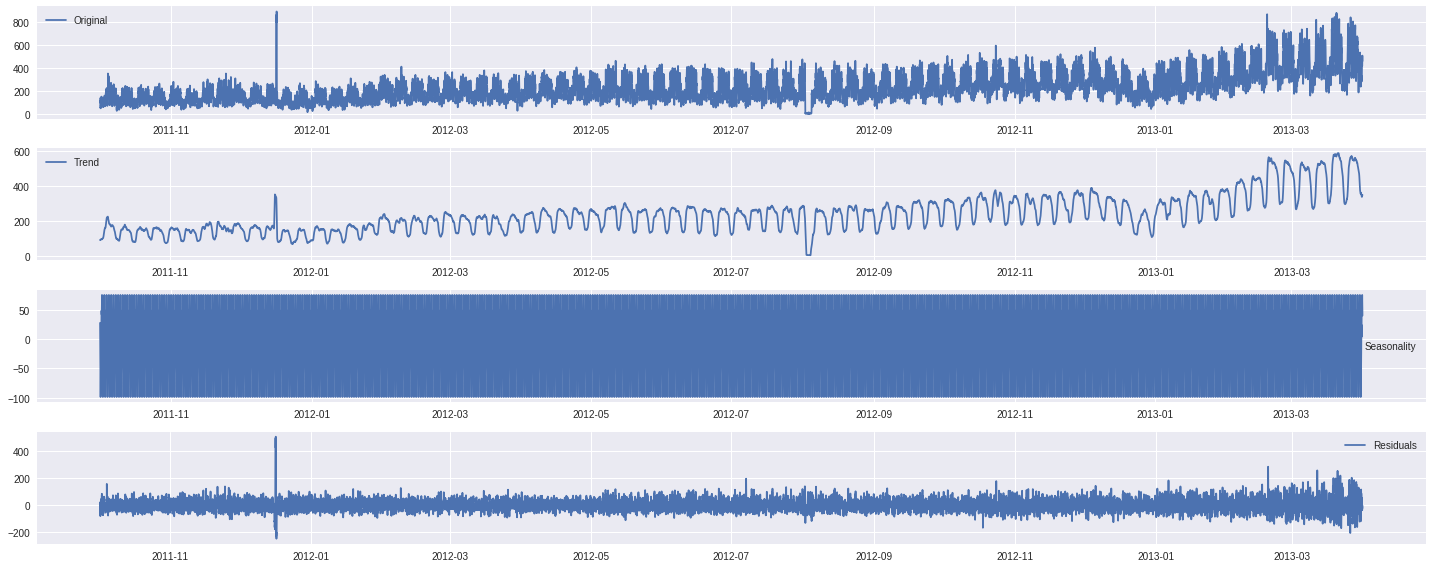

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

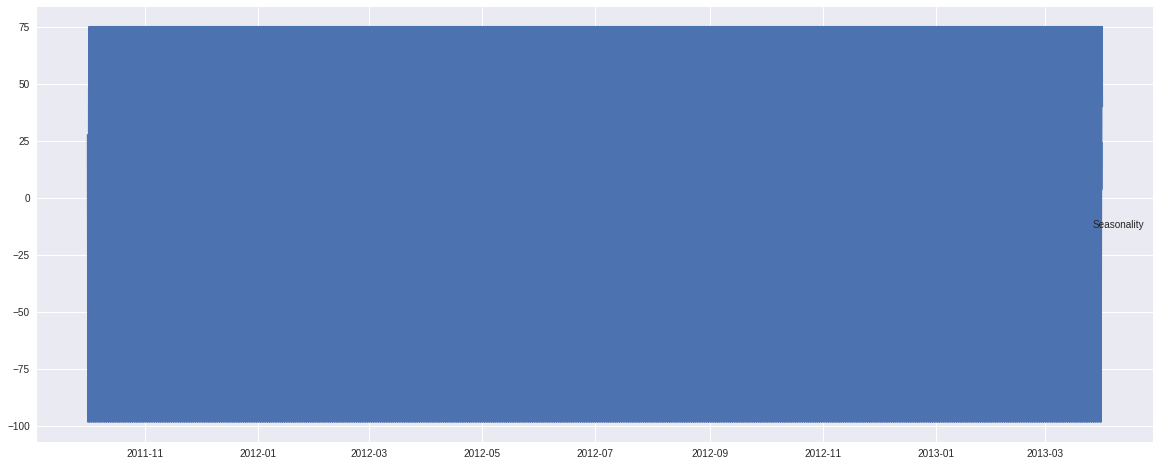

In [25]:
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/home/prabhat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


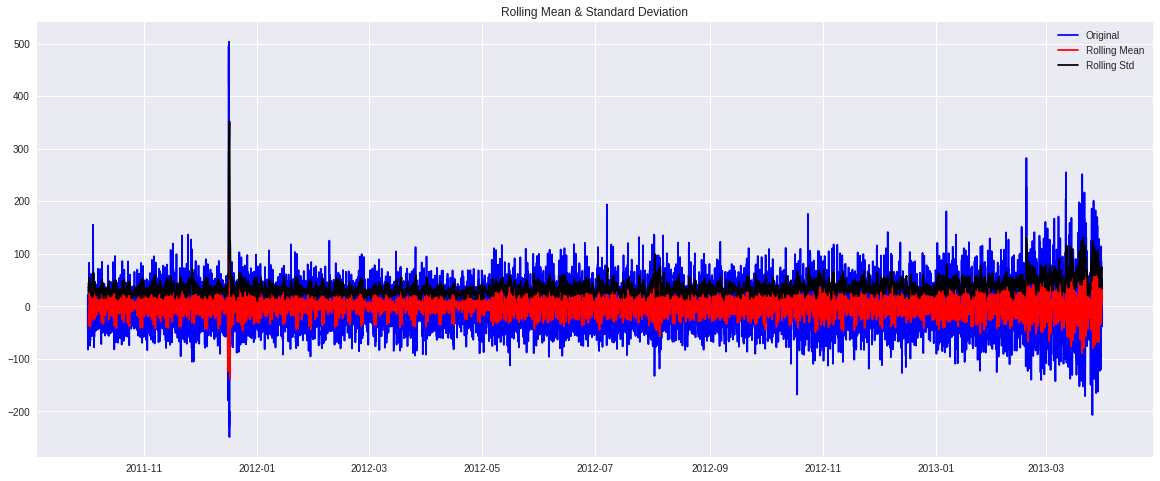

Results of Dickey-Fuller Test:
Test Statistic                   -25.149184
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    13086.000000
Critical Value (5%)               -2.861761
Critical Value (1%)               -3.430850
Critical Value (10%)              -2.566888
dtype: float64


In [26]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
lag_acf = acf(data_diff)
lag_pacf = pacf(data_diff, method='ols')

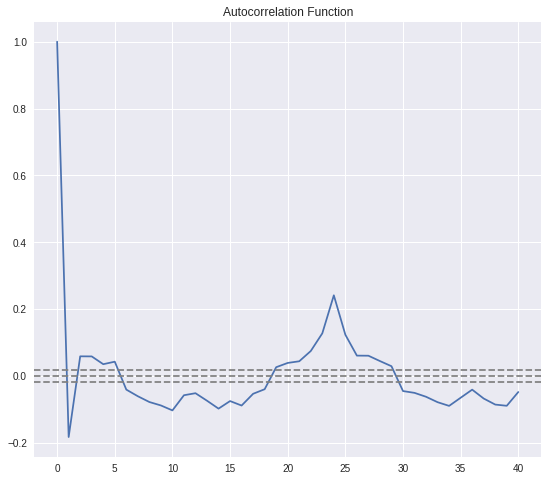

In [29]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

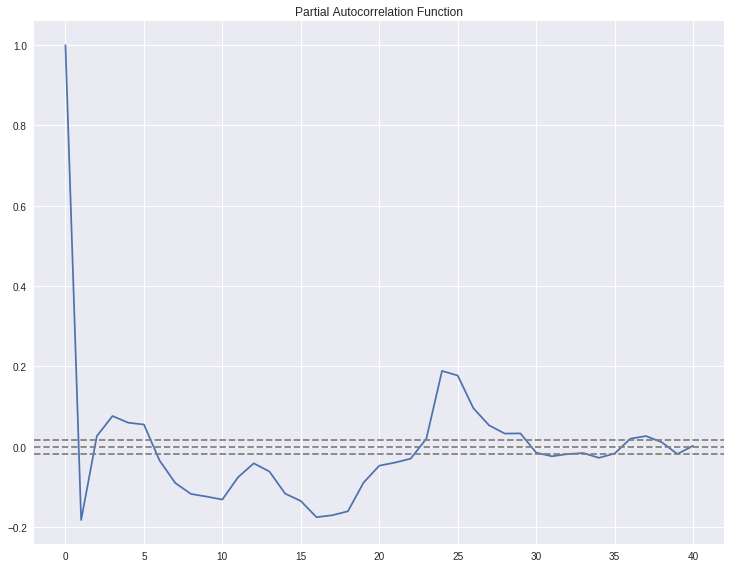

In [30]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
data['Count']=data['Count'].astype(float)

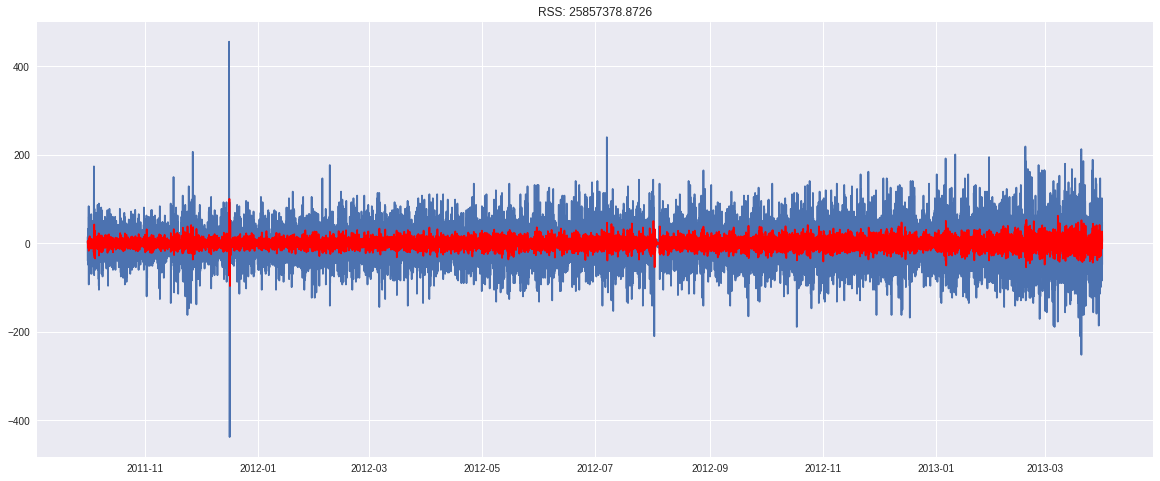

In [33]:
model = ARIMA(data, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(data_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_diff.unstack())**2))

In [34]:
lag_acf = acf(data)
lag_pacf = pacf(data, method='ols')

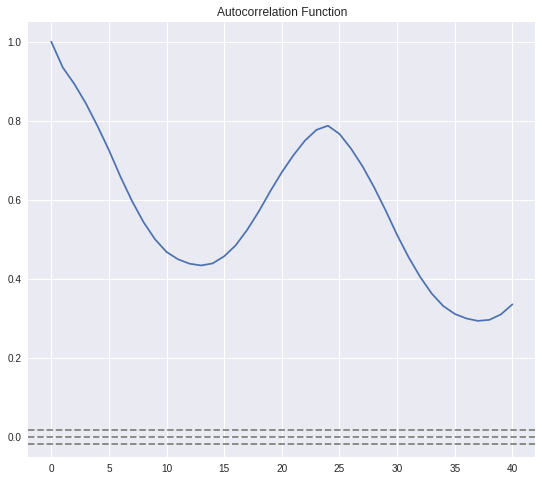

In [35]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

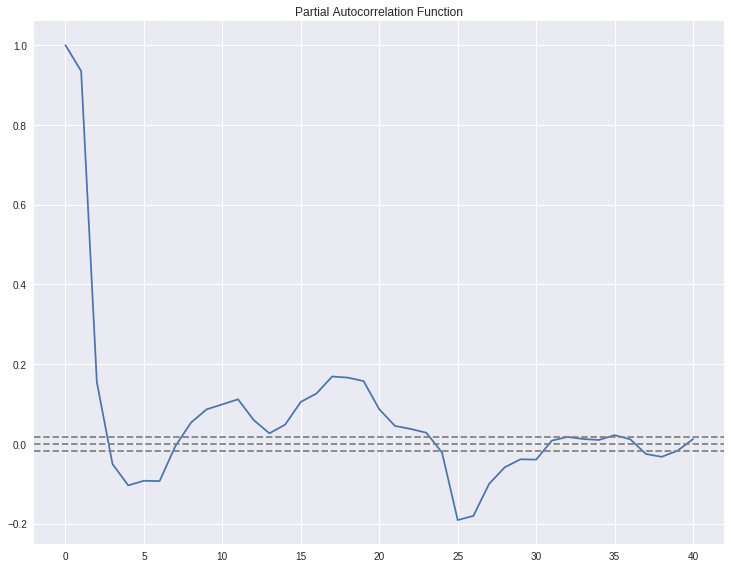

In [36]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

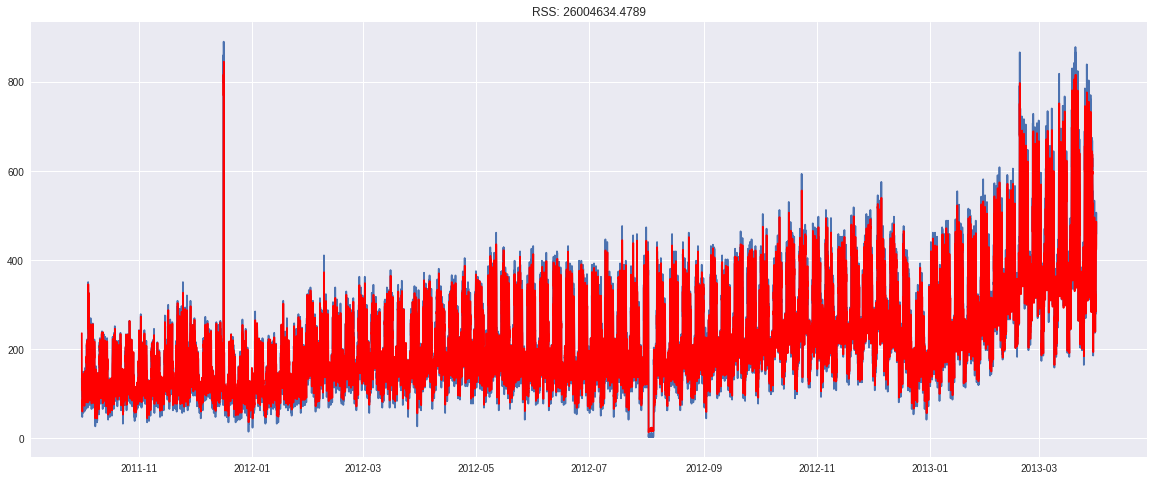

In [37]:
model = ARIMA(data, order=(3, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data.unstack())**2))

In [38]:
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.99)
	train, test = X[0:-72], X[-72:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [39]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [40]:
import warnings
p_values = [0, 1, 2, 3, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(data.unstack().values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=45395.769
ARIMA(0, 0, 1) MSE=17227.996
ARIMA(0, 0, 2) MSE=9681.462
ARIMA(0, 1, 0) MSE=3570.737
ARIMA(0, 1, 1) MSE=3701.594
ARIMA(0, 1, 2) MSE=3652.646
ARIMA(0, 2, 0) MSE=7165.672
ARIMA(0, 2, 1) MSE=3571.572
ARIMA(1, 0, 0) MSE=3479.027
ARIMA(1, 0, 1) MSE=3574.861
ARIMA(1, 0, 2) MSE=3516.495
ARIMA(1, 1, 0) MSE=3694.357
ARIMA(1, 1, 1) MSE=3419.560
ARIMA(1, 1, 2) MSE=3503.773
ARIMA(1, 2, 0) MSE=4851.534
ARIMA(1, 2, 2) MSE=3680.085
ARIMA(2, 0, 0) MSE=3577.259
ARIMA(2, 0, 1) MSE=3408.051
ARIMA(2, 0, 2) MSE=3553.798
ARIMA(2, 1, 0) MSE=3665.715
ARIMA(2, 1, 1) MSE=3511.577
ARIMA(2, 1, 2) MSE=3632.854
ARIMA(2, 2, 0) MSE=4453.759
ARIMA(2, 2, 2) MSE=3699.707
ARIMA(3, 0, 0) MSE=3520.703
ARIMA(3, 0, 2) MSE=3512.400
ARIMA(3, 1, 0) MSE=3630.419
ARIMA(3, 1, 1) MSE=3422.696
ARIMA(3, 1, 2) MSE=3564.434
ARIMA(3, 2, 0) MSE=4379.396
Best ARIMA(2, 0, 1) MSE=3408.051


2